# Importing python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
adidas_dataset= pd.read_excel("Adidas US Sales Datasets.xlsx")

# Information about the dataset

In [3]:
adidas_dataset.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
adidas_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      float64       
 1   Retailer          9648 non-null   object        
 2   Retailer ID       9648 non-null   int64         
 3   Invoice Date      9648 non-null   datetime64[ns]
 4   Region            9648 non-null   object        
 5   State             9648 non-null   object        
 6   City              9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9648 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [5]:
adidas_dataset.isnull().sum() #determining the null values

Unnamed: 0          9648
Retailer               0
Retailer ID            0
Invoice Date           0
Region                 0
State                  0
City                   0
Product                0
Price per Unit         0
Units Sold             0
Total Sales            0
Operating Profit       0
Operating Margin       0
Sales Method           0
dtype: int64

In [6]:
adidas_dataset[adidas_dataset.duplicated()] #determining the duplicate values

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


In [7]:
adidas_dataset.drop(['Unnamed: 0','Retailer ID'], axis=1, inplace= True)  #data preprocessing

In [8]:
adidas_dataset.describe()   #descriptive statistics

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


# EDA

<Axes: xlabel='Invoice Date'>

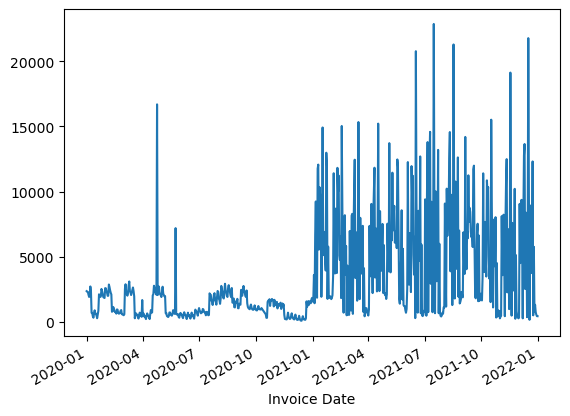

In [9]:
adidas_dataset.groupby(["Invoice Date"])["Units Sold"].sum().plot.line()

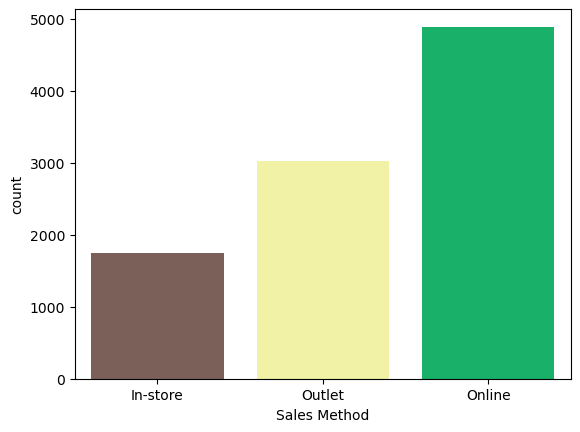

In [10]:
sns.countplot(x='Sales Method',data=adidas_dataset,palette='terrain_r')  #count plot
plt.show()

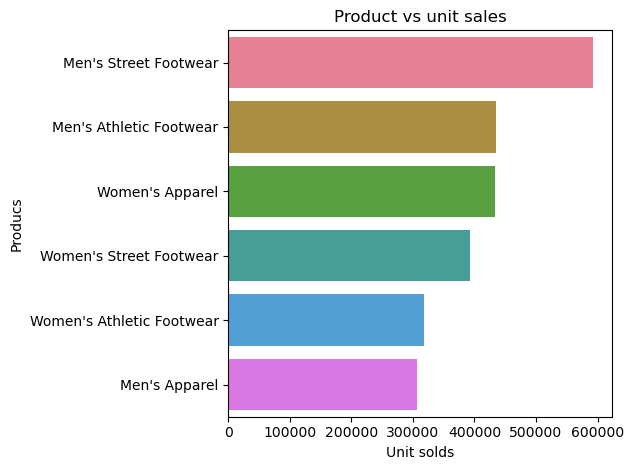

In [11]:
products_adidas=adidas_dataset.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
sns.barplot(x=products_adidas.values, y=products_adidas.index, palette="husl")
plt.title('Product vs unit sales')
plt.xlabel('Unit solds')
plt.ylabel('Producs')
plt.tight_layout()

<Axes: xlabel='Retailer', ylabel='Total Sales'>

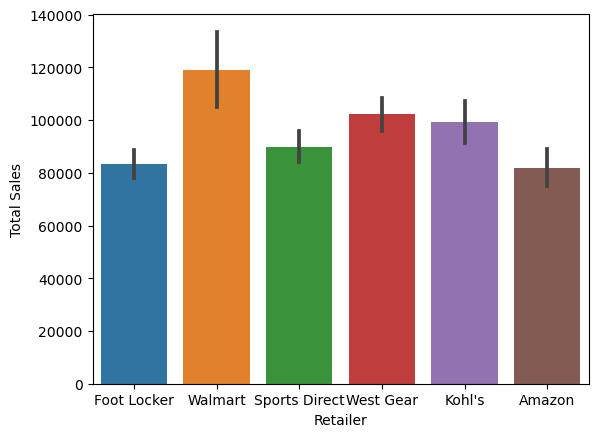

In [12]:
sns.barplot(data= adidas_dataset ,x="Retailer" , y="Total Sales")

<Axes: xlabel='Sales Method', ylabel='count'>

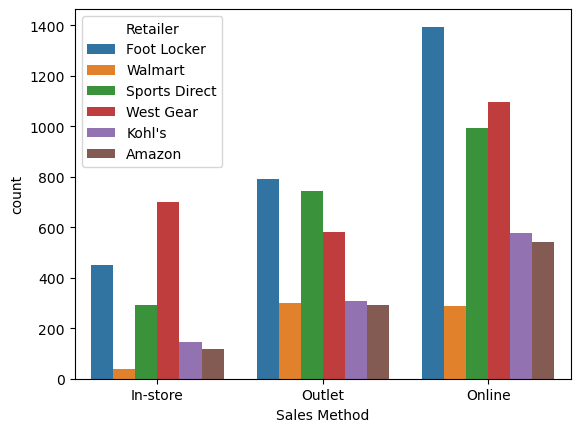

In [13]:
sns.countplot(data= adidas_dataset ,x="Sales Method" ,hue="Retailer" )

<Axes: xlabel='Price per Unit', ylabel='Total Sales'>

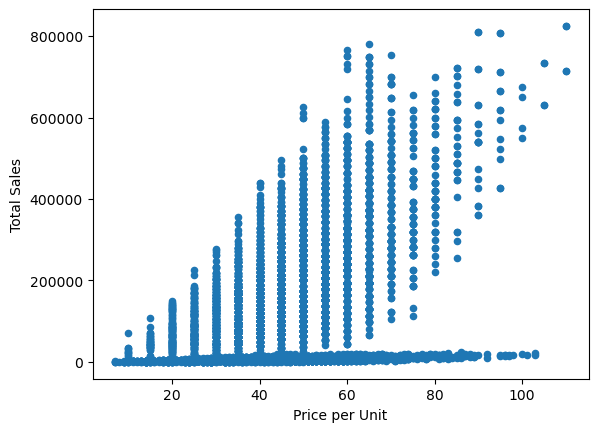

In [14]:
adidas_dataset.plot.scatter(x='Price per Unit', y='Total Sales')

<Axes: title={'center': 'Operating Profit'}, xlabel='[Sales Method]'>

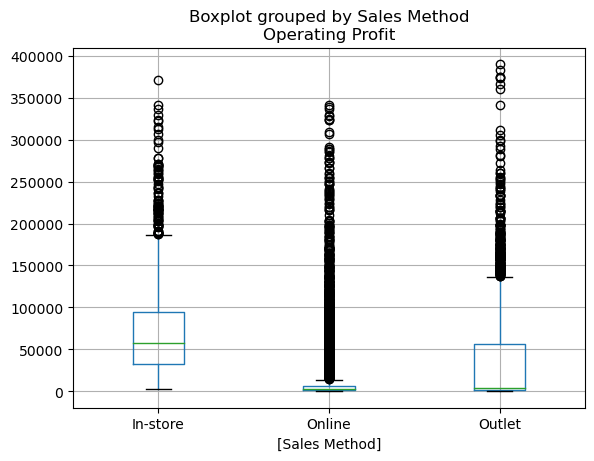

In [15]:
adidas_dataset[["Sales Method", "Operating Profit"]].boxplot(by = "Sales Method")

# 2-sample t-test

In [16]:
outlet_sales = adidas_dataset[adidas_dataset['Sales Method'] == 'Outlet']['Total Sales']
online_sales = adidas_dataset[adidas_dataset['Sales Method'] == 'Online']['Total Sales']

In [17]:
import scipy.stats as stats 
t_stat, p_value = stats.ttest_ind(outlet_sales, online_sales, equal_var=True)
print(t_stat , p_value)

16.08516306156656 2.6153943238277634e-57


# Prediction analysis

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
adidas_dataset['Sales Method'] = label_encoder.fit_transform(adidas_dataset['Sales Method'])
adidas_dataset['Region'] = label_encoder.fit_transform(adidas_dataset['Region'])
adidas_dataset['Product'] = label_encoder.fit_transform(adidas_dataset['Product'])

In [19]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [20]:
X = adidas_dataset[['Region', 'Product', 'Sales Method', 'Price per Unit', 'Units Sold',
          'Operating Profit', 'Operating Margin']]
y = adidas_dataset['Total Sales']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
scalers = StandardScaler()
X_train = scalers.fit_transform(X_train)
X_test = scalers.transform(X_test)

# Linear regression

In [23]:
regr_model = LinearRegression() 
regr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
linear_score = cross_val_score(regr_model, X_train, y_train, cv=5)  #k_folds=5
print("Cross Validation Scores of logistic regression model: ", linear_score)
print("Average CV Score of logistic regression model: ", linear_score.mean())
print("Number of CV Scores used in Average of logistic regression model: ", len(linear_score))

Cross Validation Scores of logistic regression model:  [0.96121437 0.95698148 0.95337242 0.96076648 0.95879569]
Average CV Score of logistic regression model:  0.9582260848717045
Number of CV Scores used in Average of logistic regression model:  5


In [25]:
y_pred_regression = regr_model.predict(X_test)

In [26]:
mean_squared_error(y_test, y_pred_regression)

936011305.2327393

In [27]:
r2_score(y_test, y_pred_regression)

0.9545768379551789

In [28]:
mean_absolute_error(y_test, y_pred_regression)

19412.222839417856

# Decision tree regression

In [29]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
decision_tree_score = cross_val_score(decision_tree, X_train, y_train, cv=5)  #k_folds=5
print("Cross Validation Scores of Decision tree model: ", decision_tree_score)
print("Average CV Score of Decision tree model: ", decision_tree_score.mean())
print("Number of CV Scores used in Average of Decision tree model: ", len(decision_tree_score))

Cross Validation Scores of Decision tree model:  [0.99732352 0.99642627 0.9943813  0.99758683 0.99703718]
Average CV Score of Decision tree model:  0.9965510198108252
Number of CV Scores used in Average of Decision tree model:  5


In [31]:
y_pred_decision = decision_tree.predict(X_test)

In [32]:
mean_squared_error(y_test, y_pred_decision)

38309486.44317788

In [33]:
r2_score(y_test, y_pred_decision)

0.998140900648492

In [34]:
mean_absolute_error(y_test, y_pred_decision)

995.5512953367918

# KNN regression

In [35]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [36]:
knn_score = cross_val_score(knn_model, X_train, y_train, cv=5)  #k_folds=5
print("Cross Validation Scores of KNN model: ", knn_score)
print("Average CV Score of KNN model: ", knn_score.mean())
print("Number of CV Scores used in Average of KNN model: ", len(knn_score))

Cross Validation Scores of KNN model:  [0.98646359 0.98770002 0.98757516 0.98810303 0.98944838]
Average CV Score of KNN model:  0.9878580384835682
Number of CV Scores used in Average of KNN model:  5


In [37]:
y_pred_knn = knn_model.predict(X_test)

In [38]:
mean_squared_error(y_test, y_pred_knn)

196698810.51894075

In [39]:
r2_score(y_test, y_pred_knn)

0.9904545149248984

In [40]:
mean_absolute_error(y_test, y_pred_knn)

6944.047092688545

# Clustering

In [41]:
from sklearn.cluster import KMeans   #kmeans clustering
X_clustering = adidas_dataset[['Price per Unit', 'Units Sold']]

In [42]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    inertia.append(kmeans.inertia_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

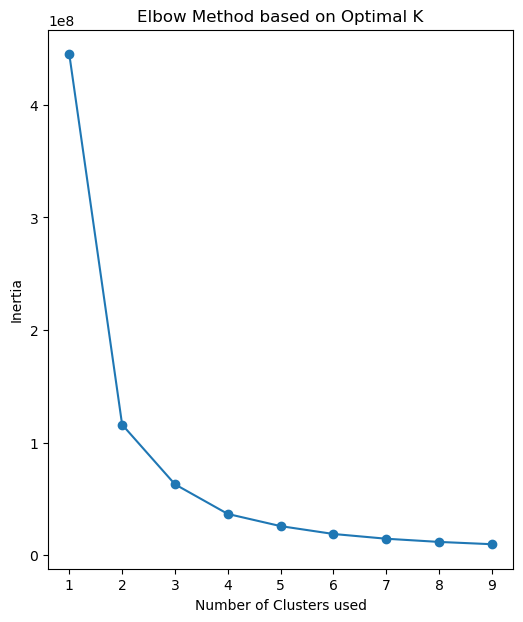

In [43]:
plt.figure(figsize=(6, 7))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters used')
plt.ylabel('Inertia')
plt.title('Elbow Method based on Optimal K')
plt.show()

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42)
adidas_dataset['Cluster'] = kmeans.fit_predict(X_clustering)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


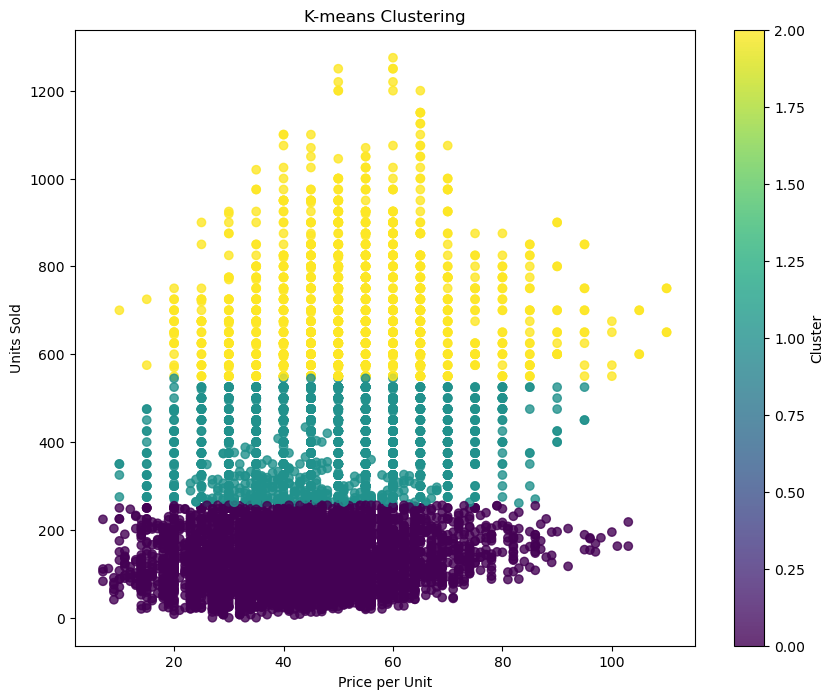

In [45]:
plt.figure(figsize=(10, 8))
plt.scatter(X['Price per Unit'], X['Units Sold'], c=adidas_dataset['Cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()